# Sources

[Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent class
class GD:
    
    # func is a function that we need to find the minimum value
    # gradient is a slope of a curve at a given point in a specified direction
    # maxLoops: maximum number of iterations
    # initialPoint: a starting point to start the algorithm
    # learnRate: a scaling factor for step sizes
    # tolerance: the condition to stop the algorithm
    # start_x: the starting point to show a graph of the function
    # end_x: the end point to show a graph of the function
    # step_x: the distance between 2 consecutive points of a graph of the function
    def __init__(self, func, gradient, maxLoops, learnRate, tolerance, start_x, end_x, step_x):
        self.func = func
        self.gradient = gradient
        self.maxLoops = maxLoops
        self.learnRate = learnRate
        self.tolerance = tolerance
        self.start_x = start_x
        self.end_x = end_x
        self.step_x = step_x
    
    def findMin(self, initialPoint):
        # choose a starting point
        x = initialPoint
        steps = [initialPoint] # history tracking

        # loop until the maximum number of iterations is still not reached
        for _ in range(self.maxLoops):

            # calculate gradient at this point
            # calculate the step size
            diff = self.learnRate * self.gradient(x)        

            # continue if the step size is still tolerated
            if np.abs(diff) < self.tolerance:
                break

            # make a scaled step in the opposite direction to the gradient
            # objective is to minimize
            x -= diff

            # store the next point in the history
            steps.append(x)

        return steps, x
        
    def show(self, steps):
        
        def showGradientDescentSteps(steps):
            xs = steps
            ys = list(map(self.func, xs))
            # create a scatter plot to display the gradient descent path
            plt.scatter(xs[::2], ys[::2], color='red')      # odd indexes
            plt.scatter(xs[1::2], ys[1::2], color='blue')   # even indexes


        def showFunction():
            xs = []
            ys = []
            for x in np.arange(self.start_x, self.end_x + self.step_x, self.step_x):
                xs.append(x)
                ys.append(self.func(x))
            plt.plot(xs, ys, 'gray')
            
        # add labels and a title
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Find the minimum value')
        
        # show gradient descent & function
        showGradientDescentSteps(steps)
        showFunction()

        # draw the plot
        plt.show()


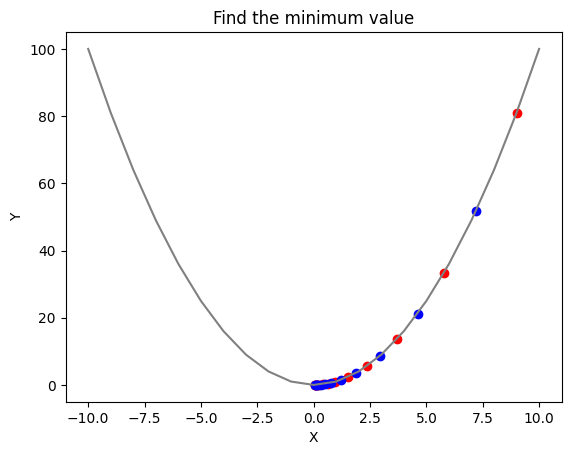

In [5]:
# MAIN PROGRAM

def func(x):
    return x*x

def gradient(x):
    return 2*x

gd = GD(func, gradient, 100, 0.1, 0.01, -10, 10, 1)
steps, _ = gd.findMin(9)
gd.show(steps)


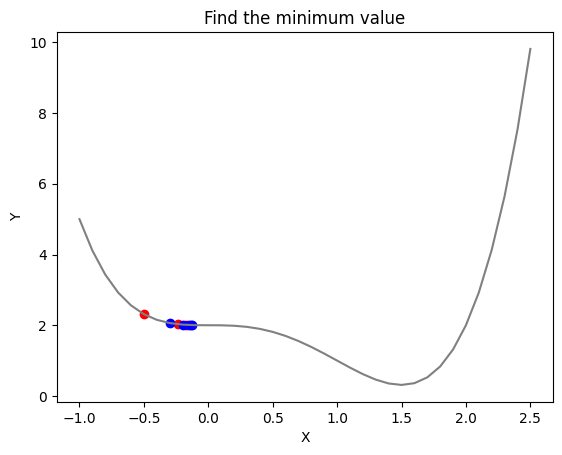

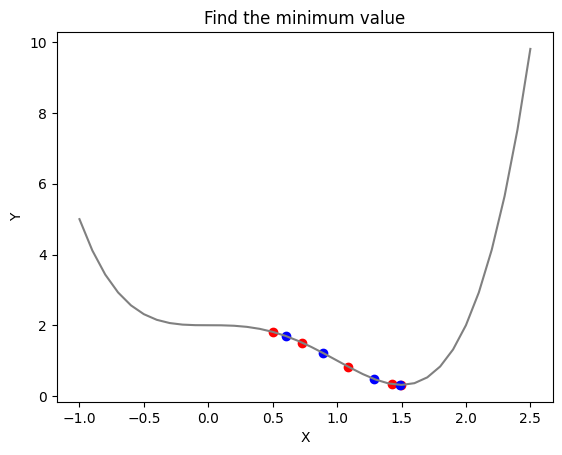

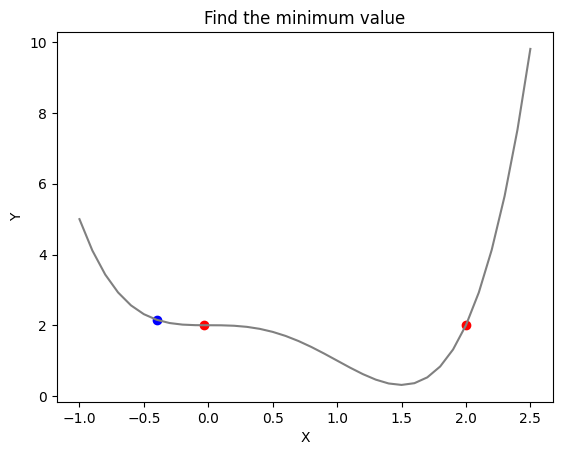

In [17]:
def func(x):
    return x ** 4 - 2 * (x ** 3) + 2

def gradient(x: float):
    return 4 * (x ** 3) - 6 * (x ** 2)

gd = GD(func, gradient, 100, 0.1, 0.01, -1, 2.5, 0.1)

# try to escape the plateau (saddle points)
steps, _ = gd.findMin(-0.5)
gd.show(steps)

# good
steps, _ = gd.findMin(0.5)
gd.show(steps)

# bad as the next point jumps into a plateau
gd.learnRate = 0.3
steps, _ = gd.findMin(2)
gd.show(steps)
